# Notebook to visualize training transforms for SELMA3D data

## Setup

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import sys
import tifffile as tiff

from monai.transforms import (
    EnsureChannelFirstd,
    Compose,
    MapTransform,
    RandAffined,
    RandFlipd,
    RandGaussianNoised,
    RandScaleIntensityd,
    RandShiftIntensityd,
    ToTensord
)
from monai.data import Dataset, DataLoader


In [2]:
# get functions from other files
sys.path.append('/home/ads4015/ssl_project/preprocess_patches/src')
from selma3d_visualization_functions import LoadTiffd, get_train_transforms, get_val_transforms


In [3]:
# set seed for reproducibility
random.seed(100)


In [4]:
# define paths to data
data_root = '/midtier/paetzollab/scratch/ads4015/data_selma3d/small_patches'
data_types = ['ab_plaque', 'cfos', 'nucleus', 'vessel_eb', 'vessel_wga']


In [5]:
# choose N random files of each type
N = 3
samples = []
for dtype in data_types:
    folder = os.path.join(data_root, dtype)
    files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.tiff')]
    selected_files = random.sample(files, min(N, len(files)))
    samples += [{'image': f, 'label': dtype} for f in selected_files]

samples


[{'image': '/midtier/paetzollab/scratch/ads4015/data_selma3d/small_patches/ab_plaque/ab_plaque_sample2_C01_p2936.tiff',
  'label': 'ab_plaque'},
 {'image': '/midtier/paetzollab/scratch/ads4015/data_selma3d/small_patches/ab_plaque/ab_plaque_sample4_C01_p5863.tiff',
  'label': 'ab_plaque'},
 {'image': '/midtier/paetzollab/scratch/ads4015/data_selma3d/small_patches/ab_plaque/ab_plaque_sample1_C01_p12455.tiff',
  'label': 'ab_plaque'},
 {'image': '/midtier/paetzollab/scratch/ads4015/data_selma3d/small_patches/cfos/cfos_sample15_C01_p1611.tiff',
  'label': 'cfos'},
 {'image': '/midtier/paetzollab/scratch/ads4015/data_selma3d/small_patches/cfos/cfos_sample18_C01_p9662.tiff',
  'label': 'cfos'},
 {'image': '/midtier/paetzollab/scratch/ads4015/data_selma3d/small_patches/cfos/cfos_sample4_C01_p6788.tiff',
  'label': 'cfos'},
 {'image': '/midtier/paetzollab/scratch/ads4015/data_selma3d/small_patches/nucleus/nucleus_sample3_C01_p76493.tiff',
  'label': 'nucleus'},
 {'image': '/midtier/paetzollab/

## Transforms

In [6]:
# get train and val transforms
train_transforms = get_train_transforms()
load_transforms = get_val_transforms()


## Visualize

In [7]:
# visualize original image and transforms
def visualize_patch(original, augmented, label, idx, filepath):

    # define center slice
    center_z = original.shape[1] // 2

    # get filename from filepath
    filename = os.path.splitext(os.path.basename(filepath))[0]

    # create plot
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(filename, fontsize=14)

    # plot original
    axs[0].imshow(original[0, center_z], cmap='gray')
    axs[0].set_title(f'Original')
    axs[1].imshow(augmented[0, center_z], cmap='gray')
    axs[1].set_title('Augmented')

    # format and show figure
    for ax in axs: ax.axis('off')
    plt.tight_layout()
    # plt.savefig(f'preview_{label}_{idx}.png') # uncomment this line to save sample images to file
    plt.show()
    

## Apply

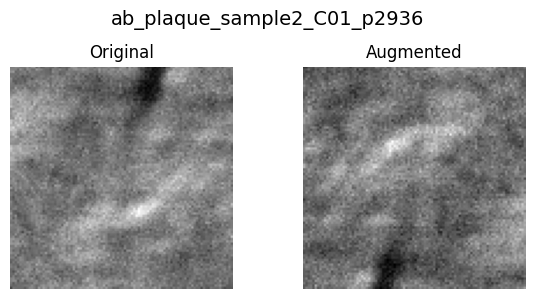

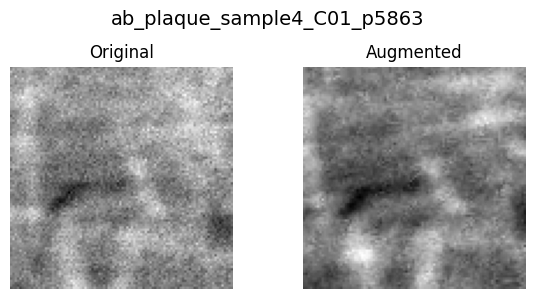

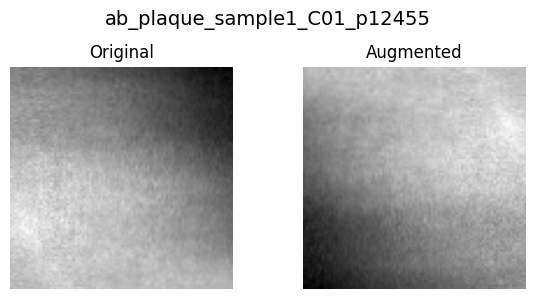

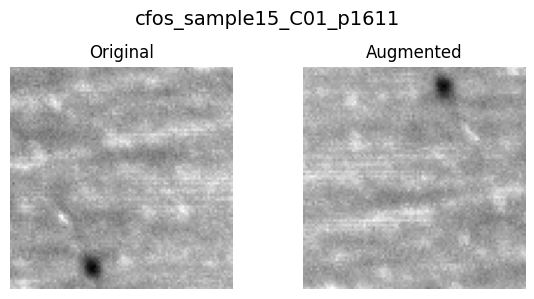

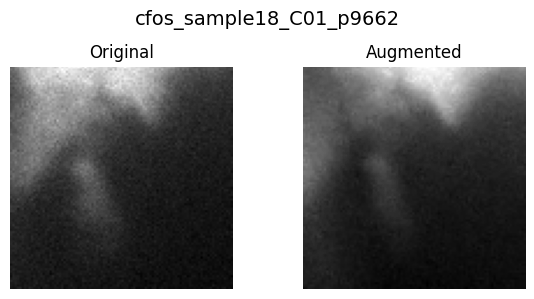

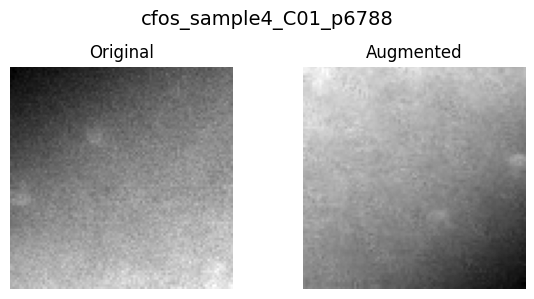

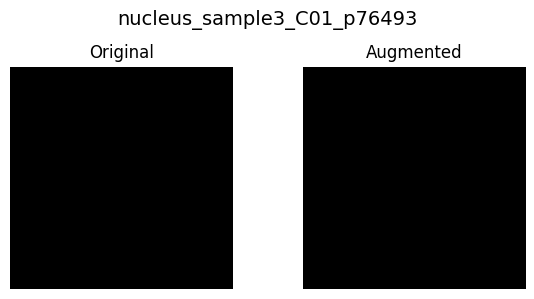

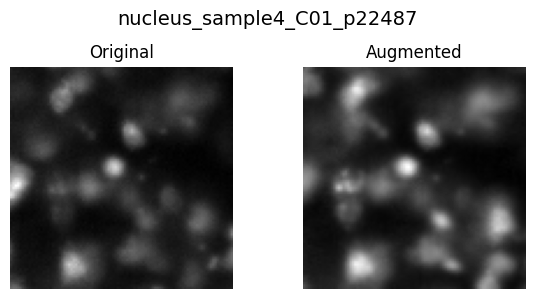

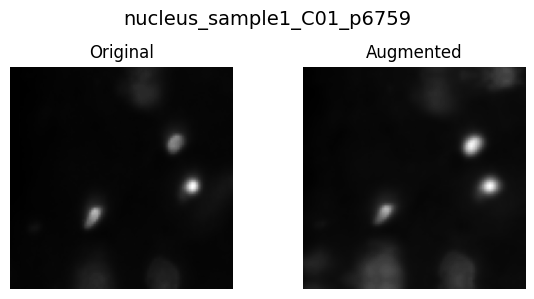

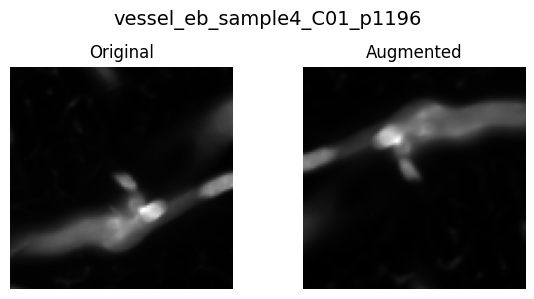

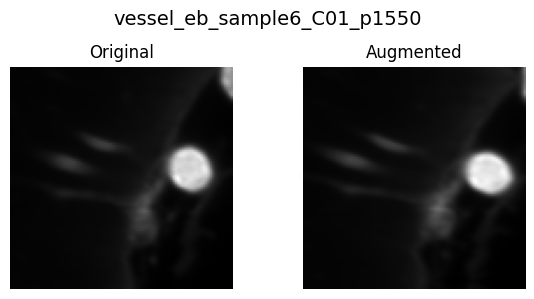

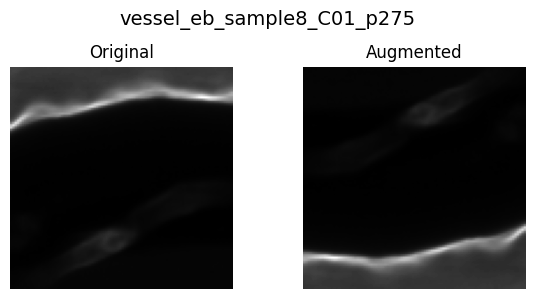

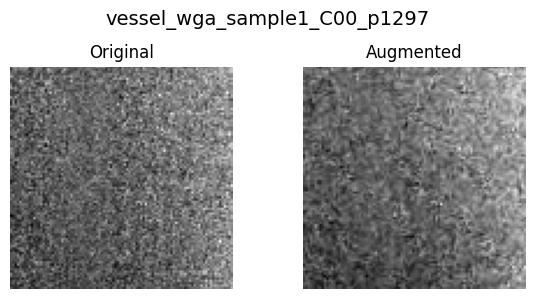

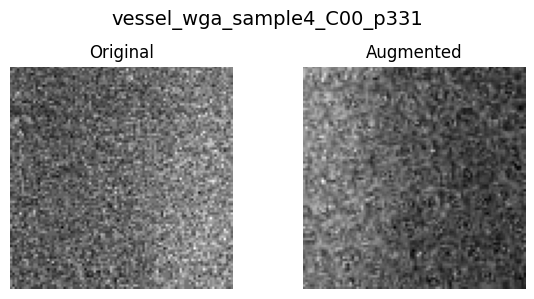

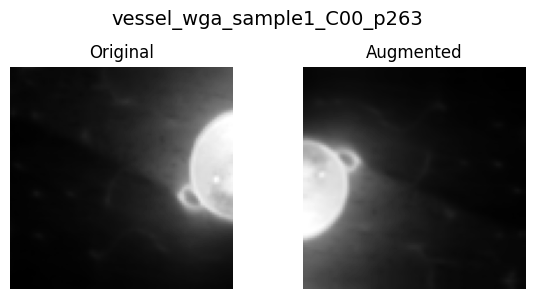

In [8]:
# loop through images and apply transformations
for i, samp in enumerate(samples):

    original = load_transforms(samp)['image']
    augmented = train_transforms(samp)['image']
    visualize_patch(original.numpy(), augmented.numpy(), samp['label'], i, samp['image'])
